# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
from copy import deepcopy

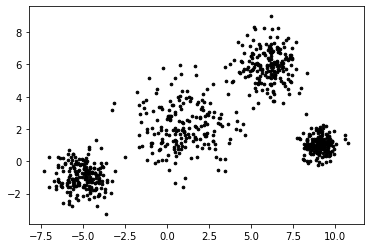

In [2]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Generated centers are colored with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

In [3]:
n = data.shape[0]
c = data.shape[1]
k = 4 # number of clusters
std = data.std()
mean = data.mean()
np.random.seed(6)
centres = np.random.randn(k, c)*std + mean
centres

array([[ 1.0430169 ,  5.53863665],
       [ 3.33061168, -1.4938254 ],
       [-8.35175241,  6.33448312],
       [ 7.25803215, -4.15028729]])

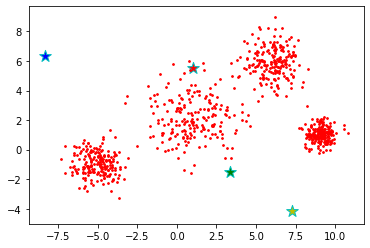

In [4]:
colors = ['r', 'g', 'b', 'y']
for i in range(k):
    plt.scatter(centres[i, 0], centres[i, 1], marker = '*', s=150, c=colors[i], edgecolors='c')
    
plt.scatter(data[:,0], data[:,1], c='r', s=3)

## 2. Visualise the clustering results in each iteration

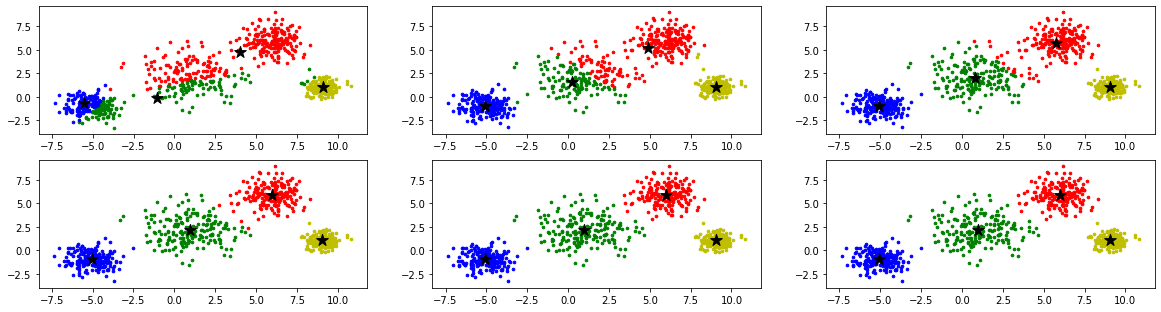

In [5]:
centres_old = np.zeros(centres.shape) # to store old centres
centres_new = deepcopy(centres) # Store new centres

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centres_new - centres_old)

fig = plt.figure(figsize=(20,8))
plt_num = 1
# When, after an update, the estimate of that centre stays the same, exit loop
while error !=0:
    ax=fig.add_subplot(3,3,plt_num)
    
    # Measure the distance to every centre
    for i in range(k):
        distances[:,i] = np.linalg.norm(data-centres_new[i], axis=1)
        
    # Assign all training data to closest centre
    clusters = np.argmin(distances, axis = 1)
    
    centres_old = deepcopy(centres_new)
    
    # Calculate mean for every clustre and update the centre 
    for i in range(k):
        centres_new[i] = np.mean(data[clusters == i], axis=0)
        points = data[clusters==i]
        ax.scatter(points[:,0], points[:,1], s=7, c=colors[i])
    ax.scatter(centres_new[:,0], centres_new[:,1], marker='*', c='k', s=150)
    error = np.linalg.norm(centres_new - centres_old)
    plt_num +=1

The six graphs represent the iterative process of the K-means clustering algorithm, where each graph corresponds to an iteration. Initially, the centroids (indicated by stars) are placed randomly. With each iteration, they move towards the actual centers of the clusters, driven by the reassignment of data points to the nearest centroid and recalculating the centroid position as the mean of the points in the cluster. As the iterations progress:

Early Iterations: The centroids move significantly as they seek the densest areas of their assigned points.
Middle Iterations: The movements of centroids become smaller as they get closer to the optimal positions.
Final Iteration: The centroids stabilize and there is little to no change in their positions, indicating convergence of the algorithm.

The result is a clear division of the dataset into four distinct clusters, each with a centroid that minimizes the within-cluster variance. The process shows how K-means efficiently partitions the data into clusters by iteratively improving the centroid positions.